<h1 align=center>Build a Regression Model With the House Price Dataset</h1>

## Description
In this notebook, we are going to build models to predict house prices in King County, U.S., based on characteristics of the home. The original dataset can be found in this [link](https://www.kaggle.com/harlfoxem/housesalesprediction)

This is a classic dataset with the following variables:

* Square footage of different part of the house: sqft_living, sqft_lot, sqft_above, sqft_basement
* Houses in the neighborhood (in 2015): sqft_living15, sqft_lot15
* Number of bedrooms, bathrooms and floors
* Waterfront or not
* Location variables: zipcode, lat, long
* Date of sale, year built, and renovated: yr_built, yr_renovated
* Quality: condition, grade, and how many times it was viewed: view
* The target variable is the price at which the house was sold.

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Acquire clean data

In [2]:
df = pd.read_csv('./Datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# drop irrelevant columns
df.drop(columns = ['id', 'zipcode', 'lat', 'long', 'date'], inplace = True)

## Understand the data
### Descriptive stats

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


### Correlation

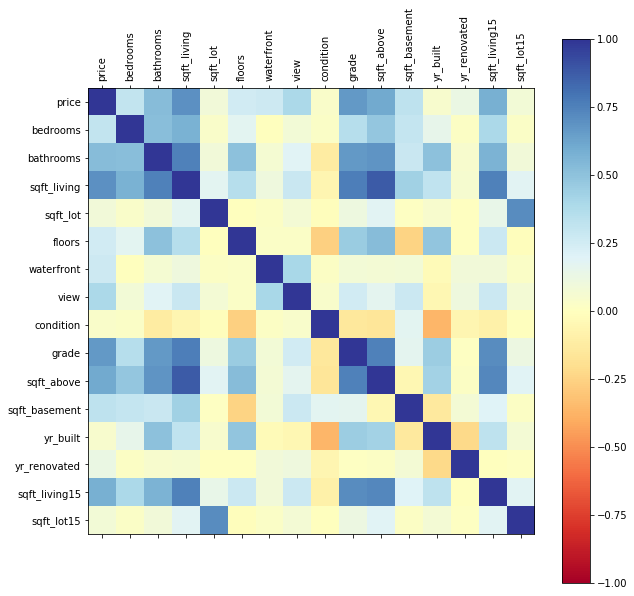

In [6]:
fig = plt.figure(figsize=(10,10))
ax = plt.matshow(df.corr(),fignum=0, vmin=-1, vmax=1, interpolation='none', cmap='RdYlBu')
fig.colorbar(ax)

plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
plt.yticks(np.arange(len(df.columns)), labels=df.columns)

plt.show()

*It appears that sqft_living, grade, sqft_above, sqft_living15 and bathrooms are the most correlatted fatures to the price variable.*
### Visulaize the data
#### Pairplot

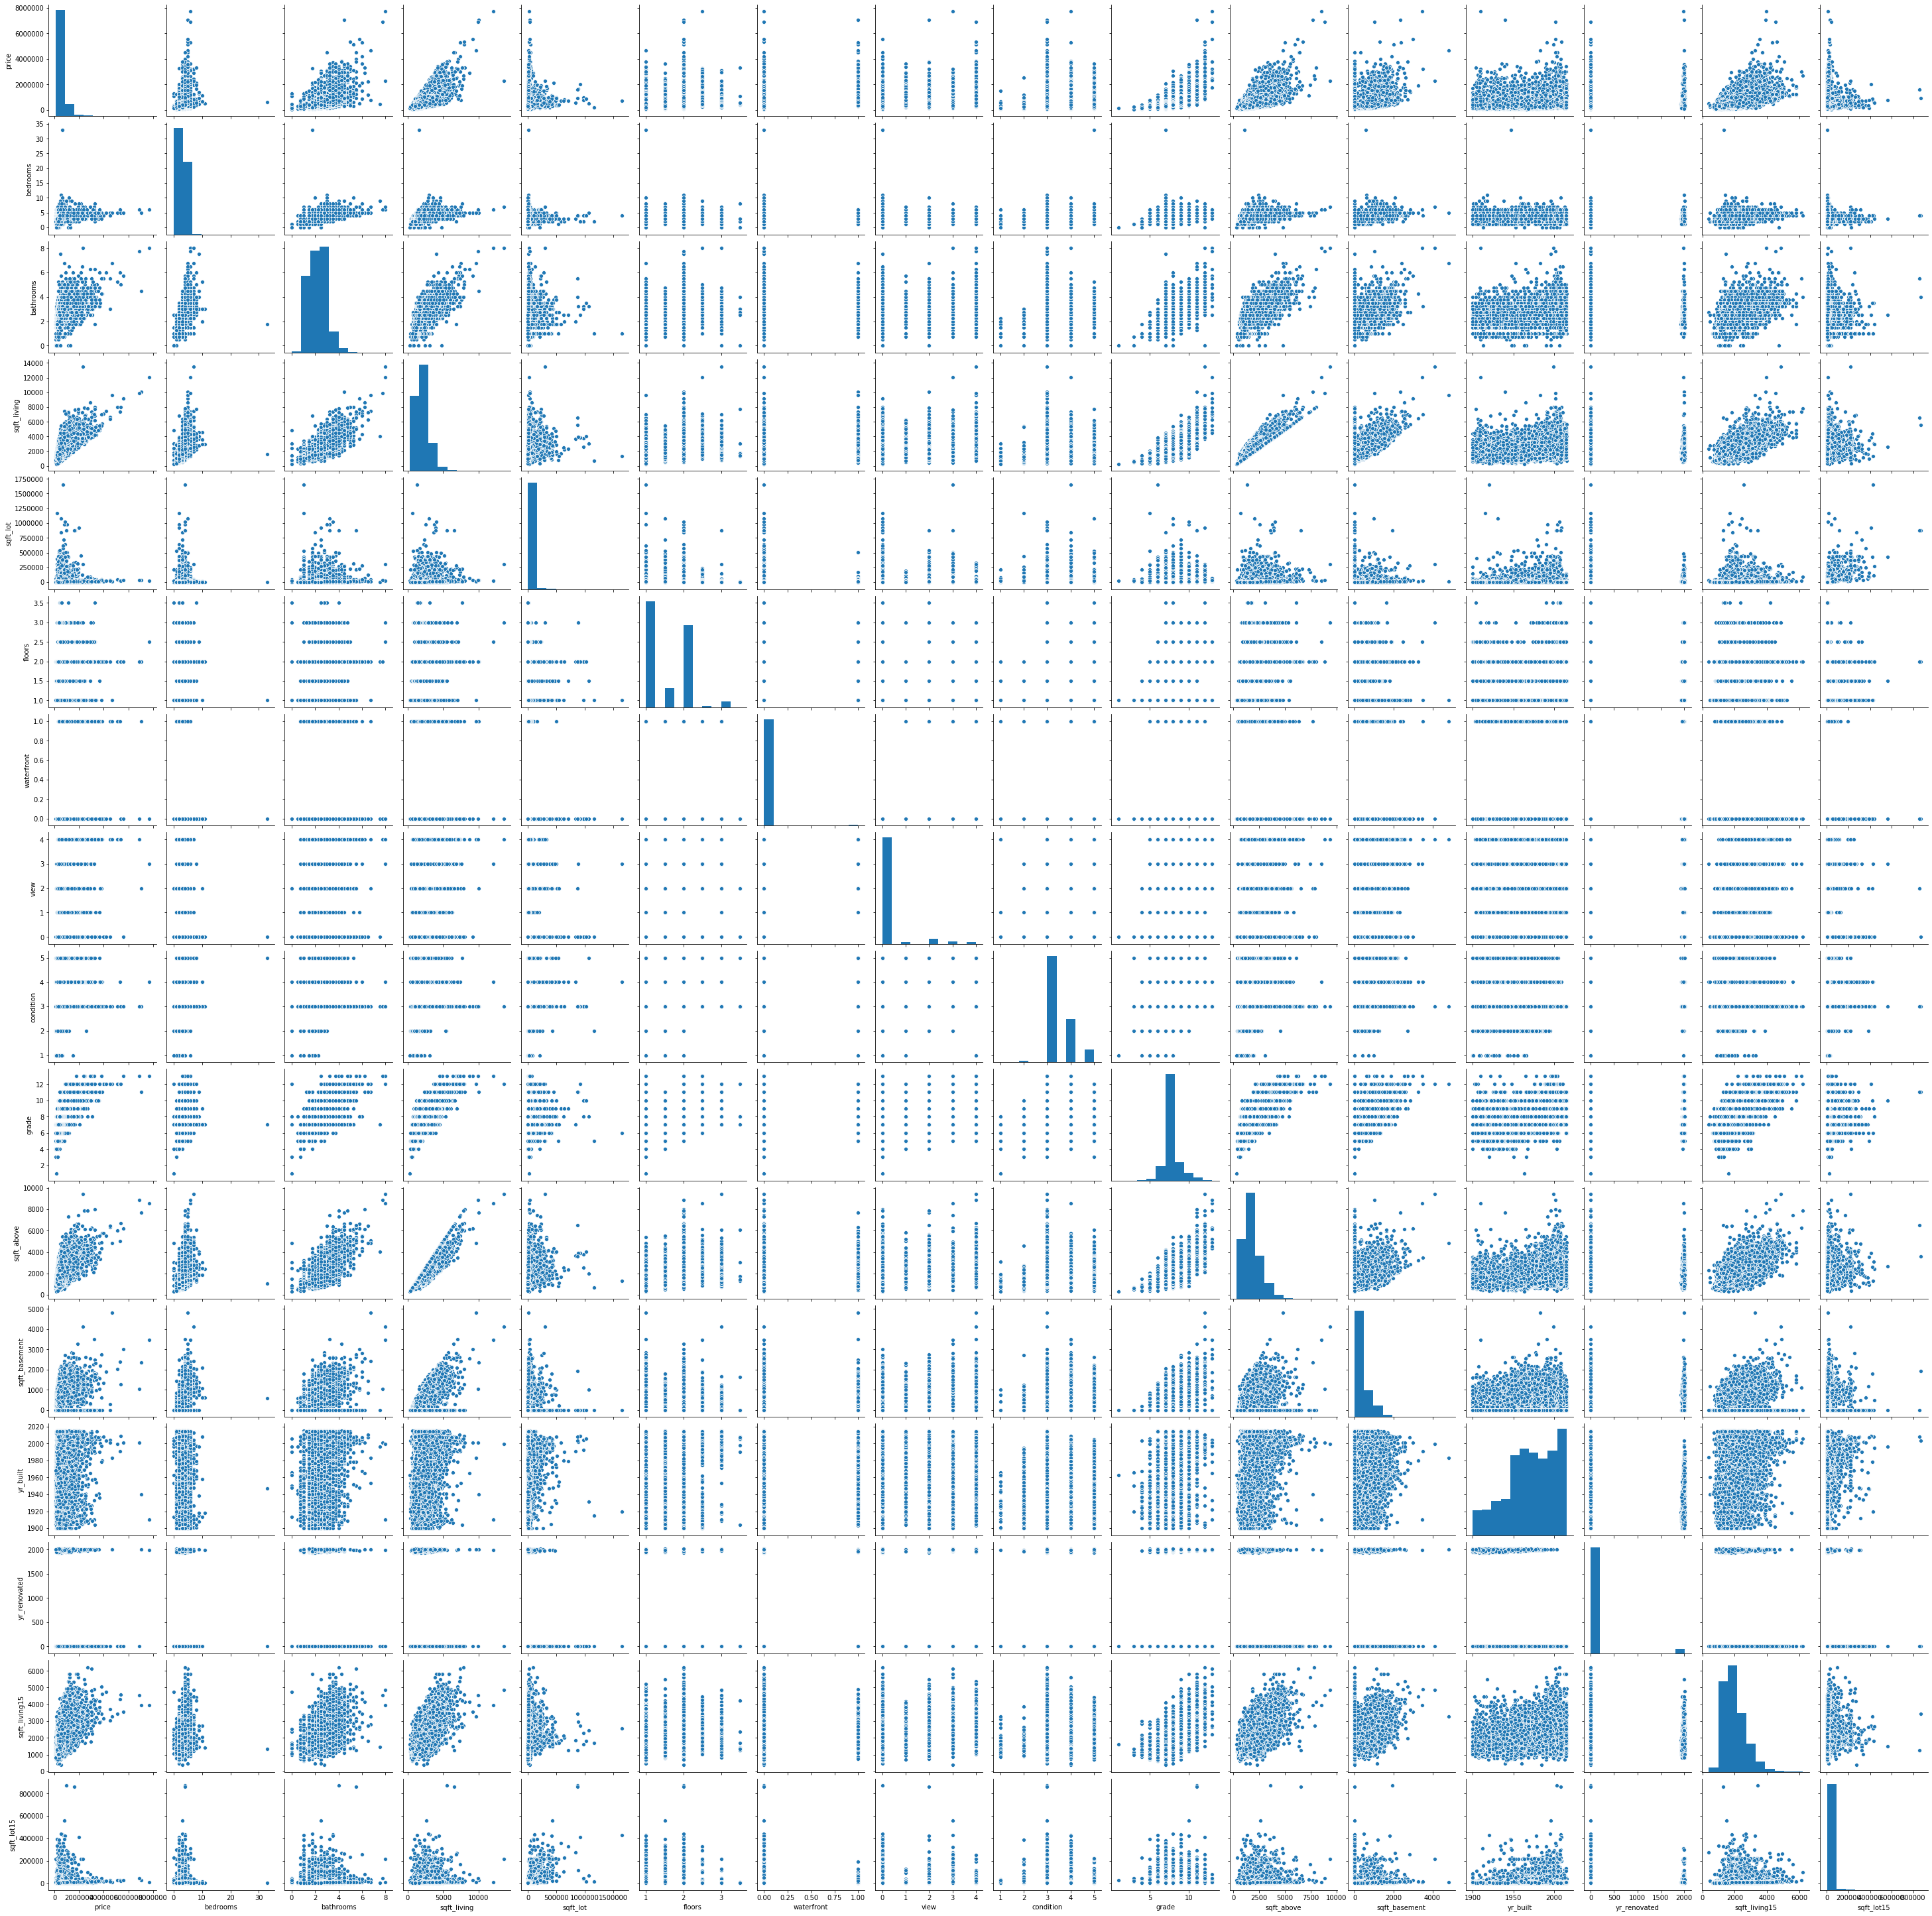

In [7]:
sns.pairplot(df)

#### Boxplots

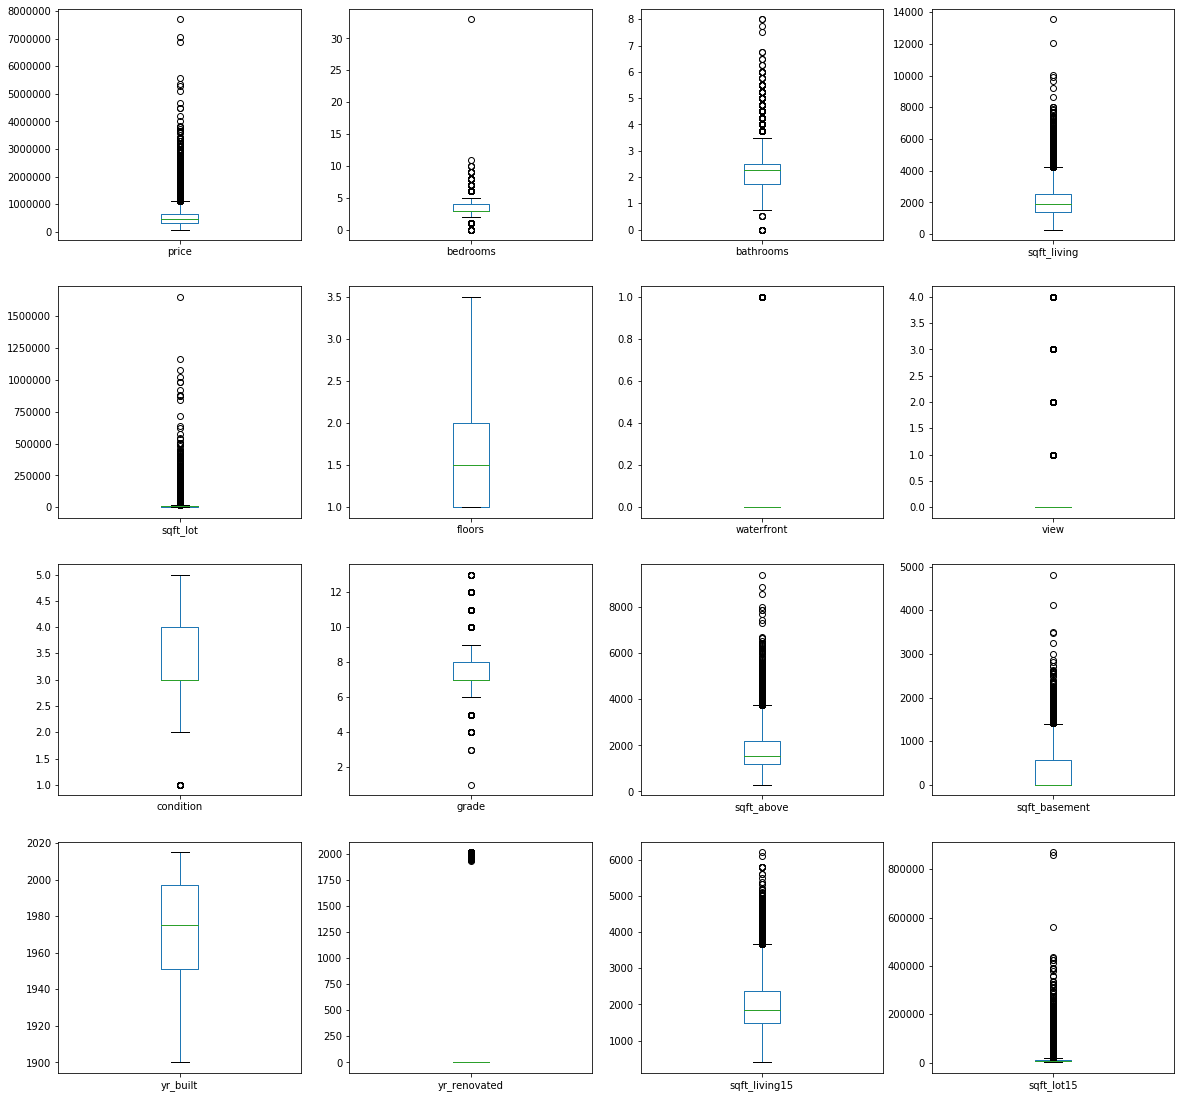

In [8]:
cols = len(df.columns)
unit_size = 5
layout_cols = 4
layout_rows = int(cols/layout_cols+layout_cols)
# Make the plots
df.plot(kind='box', subplots=True, figsize=(layout_cols*unit_size,layout_rows*unit_size), layout=(layout_rows,layout_cols))
plt.show()

## Question 1
Looking for outliers in the dataset, we notice that one house has 33 bedrooms. Similarly, we notice that 10 houses have no bathrooms. What is a good strategy to handle these house samples?

In [9]:
# check the outliers
df[(df['bedrooms']==33)|(df['bathrooms']==0)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
875,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,2360,4000
1149,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,1160,42882
3119,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,1470,1399
5832,280000.0,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,990,22549
6994,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,4740,35061
9773,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,2520,8050
9854,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,1060,7200
10481,484000.0,1,0.00,690,23244,1.0,0,0,4,7,690,0,1948,0,1690,19290
14423,139950.0,0,0.00,844,4269,1.0,0,0,4,7,844,0,1913,0,1380,9600
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,1330,4700


* There is one housewith 33 bedrooms, although the living space is only sqft_living = 1620 square feet. That's a lot of bedrooms for an average-sized house.
* There is 10 houses with no bathrooms, including two that sold for over a million dollars!

Different strategies to deal with these outliers :
* Drop the 11 samples as outliers.
* Replace the value of 33 bedrooms by a more sensible value (3, mean of bedrooms, etc.), and replace the 0 bathrooms value with 1 bathroom in all 10 samples.
* Keep the data as it is because 11 weird samples out of 21613 won't make much of a difference anyway.

In [10]:
# Create different datasets
df_original = df.copy()
print('Original dataset :', df_original.shape[0], 'rows')

df_dropped = df[(df['bedrooms']<33)&(df['bathrooms']>0)]
print('Dropped dataset :', df_dropped.shape[0], 'rows')

df_replaced = df.replace({'bedrooms':{33:3}, 'bathrooms':{0:1}})
print('Replaced dataset :', df_replaced.shape[0], 'rows')

Original dataset : 21613 rows
Dropped dataset : 21602 rows
Replaced dataset : 21613 rows


In [11]:
# evaluate each strategy
datasets = {'original' : df_original, 'drop' : df_dropped, 'replace' : df_replaced}
for strategy, dataset in datasets.items() :
    y = dataset['price']
    X = dataset.drop('price', axis=1)
    X = sm.add_constant(X)
    result = sm.OLS(y, X).fit()
    print('Strategy : {} \t R^2 : {:.3f}%'.format(strategy, 100*result.rsquared))

Strategy : original 	 R^2 : 65.373%
Strategy : drop 	 R^2 : 65.469%
Strategy : replace 	 R^2 : 65.444%


*While there was no such great diffrences in the performance of the linear regression model, dropping these strange values will be a good move to deal with these 11 outliers*

## Question 2
Looking at the correlation between the predictors and the target variable, we see that sqft_living and grade are the most correlated variables.

Build the following three linear regression models and compare their R^2 and model coefficients.

* *M1: price ~ sqft_living*
* *M2: price ~ grade*
* *M3: price ~ sqft_living + grade*

In [12]:
formulas = ['price ~ sqft_living', 'price ~ grade', 'price ~ sqft_living + grade']
for formula in formulas :
    result = smf.ols(formula, data=df).fit()
    print('Formula : {}\nR^2 : {:.3f}%\n{}'.format(formula, 100*result.rsquared, result.params))
    print('--'*20)

Formula : price ~ sqft_living
R^2 : 49.285%
Intercept     -43580.743094
sqft_living      280.623568
dtype: float64
----------------------------------------
Formula : price ~ grade
R^2 : 44.547%
Intercept   -1.056045e+06
grade        2.084576e+05
dtype: float64
----------------------------------------
Formula : price ~ sqft_living + grade
R^2 : 53.450%
Intercept     -598108.986171
sqft_living       184.420206
grade           98554.798139
dtype: float64
----------------------------------------


*We see that :*
* *M3 and M1 are both better than M2 in terms of R^2.*
* *The coefficients of M3 are smaller than the coefficients of M1 and M2 because the two predictors are highly correlated.*

## Question 3
Let's now split the dataset between a training and a testing set with the train_test_split function from scikit-lean. We want to observe the influence of the random_state parameter on the modelization.

Let's consider a testing set of only 10% of the data (that still gives over 2000 testing samples), and build several linear regression models with different values for the random_state parameter.

In [13]:
# select input features
predictors = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_living15','sqft_lot15',]
# store the score for each  random_state
scores = []
# random state values
for seed in range(0,40, 1):
    # split the dataset train (90%), test (10%)
    X_train, X_test, y_train, y_test = train_test_split(df[predictors], df.price, test_size=0.10, random_state=seed)
    # fit a linear regression model
    model = LinearRegression().fit(X_train,y_train)
    # predicted values for the test set
    yhat = model.predict(X_test)
    # record the scores
    scores.append({'seed': seed, 'RMSE': np.sqrt(mean_squared_error(yhat, y_test))})

# transform the list of dictionnaries into a dataframe for ease of use and sort the dataframe
scores = pd.DataFrame(scores).sort_values(by ='RMSE').reset_index(drop=True)
scores.head()

,seed,RMSE
0,23,199977.294727
1,22,209456.310967
2,30,211703.284347
3,26,213566.114882
4,38,213926.674518


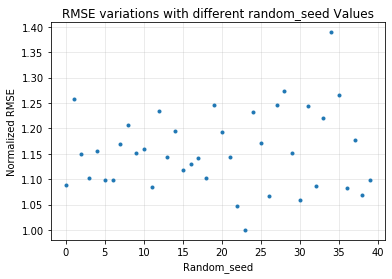

In [14]:
# plot the rmse
plt.plot(scores.seed, scores.RMSE/np.min(scores.RMSE), '.')
plt.title('RMSE variations with different random_seed Values')
plt.ylabel('Normalized RMSE')
plt.xlabel('Random_seed')
plt.grid(alpha=0.3)

> The random_state parameter is a computer system parameter that controls the way the data is randomly shuffled, and it is mostly used for reproducibility purposes. It should not influence the relevance of the modelization. 

In the above plot, we see that the RMSE can vary by as much as 40%, depending on the value of the random_state parameter. How can we be sure when comparing models that the improvements we obtain are not caused by a specific value of the random_state parameter?

*Answer : to reduce the influence of the random_state parameter on the model performance we could increase the size of the testing set so the model performance is less dependent on the samples included in the testing set.*

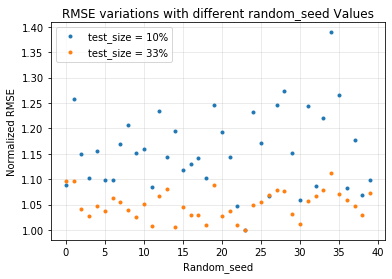

In [15]:
scores_1 = []
for seed in range(0,40, 1):
    # split the dataset train (67%), test (33%)
    X_train, X_test, y_train, y_test = train_test_split(df[predictors], df.price, test_size=0.33, random_state=seed)
    model = LinearRegression().fit(X_train,y_train)
    yhat = model.predict(X_test)
    scores_1.append({'seed': seed, 'RMSE': np.sqrt(mean_squared_error(yhat, y_test))})

scores_1 = pd.DataFrame(scores_1).sort_values(by = 'RMSE').reset_index(drop=True)

plt.plot(scores.seed, scores.RMSE/np.min(scores.RMSE), '.')
plt.plot(scores_1.seed, scores_1.RMSE/np.min(scores_1.RMSE), '.')
plt.title('RMSE variations with different random_seed Values')
plt.ylabel('Normalized RMSE')
plt.xlabel('Random_seed')
plt.grid(alpha=0.3)
plt.legend(labels=['test_size = 10%', 'test_size = 33%'])

*The random state influence is reduced, but does not disappear entirely.*
## Question 4
Looking at the values for sqft_basement and yr_renovated, we see that 60% of houses have no basement, and 95% have not been renovated.

In [16]:
print(100*round(df[df.sqft_basement == 0].shape[0] / df.shape[0], 2))
print(100*round(df[df.yr_renovated == 0].shape[0] / df.shape[0], 2))

61.0
96.0


There is a concern that keeping these variables may not be efficient:

* The zero value for sqft_basement clearly skews the distribution of that variable when there's a basement.
* Having zero as a value for yr_renovated to indicate that no renovation has ever taken place mixes two types of information in the same variable: the year of the renovation, and whether a renovation was done or not.

**Solution :** create the following two new 0 or 1 variables:

* Renovated: indicates if a renovation was done (renovated = 1) or not (renovated = 0).
* Basement: indicates if there's basement (basement = 1) or not (basement = 0).

In [17]:
df['basement'] = 0 # by default no basement 
df.loc[df.sqft_basement > 0, 'basement'] = 1 # except when the surface is not zero

df['renovated'] = 0 # by default no renovation 
df.loc[df.yr_renovated > 0, 'renovated'] = 1 # except when the year of renovation is not zero

**Compare the models built using the different variables.**

Using the following predictors for all models `predictors = ['bedrooms', 'bathrooms', 'floors']`

We will compare the three following models:

* Baseline: M1 where we don't take into account the basement or the renovation
`M1: price ~ predictors.`
* M2 the model with the original sqft_basement and yr_renovated variables.
`M2: price ~ predictors + ['sqft_basement', 'yr_renovated'].`
* M3, where we add the new binary variables to the original variables.
`M3: price ~ predictors + ['sqft_basement', 'yr_renovated', 'basement', 'renovated'].`

In [18]:
# define the predictors
M1_predictors = ['bedrooms', 'bathrooms', 'floors']
M2_predictors = M1_predictors + ['sqft_basement', 'yr_renovated']
M3_predictors = M2_predictors + ['basement', 'renovated']

predictors = {'M1': M1_predictors, 'M2': M2_predictors, 'M3': M3_predictors}

for model, inputs in predictors.items() :
    X = df[inputs]
    lr = LinearRegression().fit(X, df.price)
    yhat = lr.predict(X)
    r_squ = lr.score(X, df.price)
    print('{} : R² = {:.3f}%'.format(model, 100*r_squ))

M1 : R² = 27.768%
M2 : R² = 32.484%
M3 : R² = 33.261%


*The best performing model is M3. Adding **sqft_basement** and **yr_renovated** improved the first model and adding the **basement** and **renovated** variables to the mix slightly improves the second model.*
## Question 5
As noted before, the square footage and the ordinal variables are on very different scales. This has a direct impact on nearest neighbor models that rely on the Euclidian distance between samples. So we need to normalize the variables.

Let's Compare the two scalers for the performance of a KNN model with the following predictors :
`predictors = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_living15','sqft_lot15',]`.

In [19]:
# define the predictors
predictors = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_living15','sqft_lot15',]
# select the model
model = KNeighborsRegressor()
# define the scalers
scalers = [None, MinMaxScaler(), StandardScaler()]
for scaler in scalers :
    # select the features
    if scaler == None :
        X = df[predictors]
        scaler_name = None
    else :
        X = scaler.fit_transform(df[predictors])
        scaler_name = type(scaler).__name__
    y = df.price
    # split the features into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)
    # fit the model
    model.fit(X_train, y_train)
    # check the model
    r_squ_train = 100*model.score(X_train, y_train)
    # evaluate the model
    r_squ_test = 100*model.score(X_test, y_test)
    # print the results
    print('Scaler : {}\nTrain set : R² = {:.3f}%\nTest set : R² = {:.3f}%\n'.format(scaler_name, r_squ_train, r_squ_test))

Scaler : None
Train set : R² = 67.326%
Test set : R² = 45.743%

Scaler : MinMaxScaler
Train set : R² = 70.021%
Test set : R² = 52.899%

Scaler : StandardScaler
Train set : R² = 71.942%
Test set : R² = 54.777%



*In term of R², using a scaler leads to a better model (R² for test set incresed from 45.743% to over 52%).Also we observe that using the StandardScaler outperforms the MinMaxScaler.*

## Question 6
In parallel, we notice that the distribution of the target variable and the square footage variables are highly skewed. This may have a direct impact on the performance of a linear regression model which assumes the variables to be normally distributed.
However, to correct that and make a variable be more normally distributed we can take their log.

In the following we consider the following sets of predictors:

* The ordinal predictors which we keep untouched in all the experiments:

`ordinal_predictors = ['bedrooms', 'bathrooms', 'floors','waterfront', 'view', 'condition', 'grade']`
* The square footage surface variables: 

`sqft_variables = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_living15','sqft_lot15']`

Let's now compare the **linear regression** and the **KNN** model performance for different sets of variables

We'll transform the square_footage variables by taking their log and compare the following models

* `M1: LinearRegression` with `predictors = ordinal_variables + sqft_variables` and `target: y = df.price` 
* `M2: KNN` with `predictors = ordinal_variables + sqft_variables` and `target: y = df.price` 
* `M3: LinearRegression` with `predictors = ordinal_variables + log_sqft_variables` and `target: y = df.log_price`
* `M4: KNN` with `predictors = ordinal_variables + log_sqft_variable` and `target: y = df.log_price`

In [20]:
# select the variables
ordinal_predictors = ['bedrooms', 'bathrooms', 'floors','waterfront', 'view', 'condition', 'grade']
sqft_variables = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_living15','sqft_lot15']

# transform the square_footage variables
log_sqft_variables = []
for p in sqft_variables:
    var_name = 'log_' + p
    log_sqft_variables.append(var_name)
    df[var_name] = np.log(df[p] +1)

# create the log of the target variable
df['log_price'] = np.log(df['price'] +1)

In [21]:
# split the input features
original_variables = ordinal_predictors + sqft_variables
log_variables = ordinal_predictors + log_sqft_variables
features = [original_variables, log_variables]

# define the models
models = [LinearRegression(), KNeighborsRegressor()]

results = [] # record the results
for model in models :
    scores = {'model':type(model).__name__, 'R²_original':None, 'R²_log':None} # record the model's results
    for j in range(2) :
        if j == 0 : # evalute the model's performance with the original data
            X = df[features[j]]
            y = df.price
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)
            model.fit(X_train, y_train)
            scores['R²_original'] = round(100*model.score(X_test, y_test), 3)
        else : # evalute the model's performance with the modified data
            X = df[features[j]]
            y = df.log_price
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)
            model.fit(X_train, y_train)
            scores['R²_log'] = round(100*model.score(X_test, y_test), 3)
    results.append(scores)
    
# check the results
results = pd.DataFrame(results)
results

,model,R²_original,R²_log
0,LinearRegression,59.993,59.852
1,KNeighborsRegressor,45.744,61.165


*From the above experiments, we observe that in terms of R²:*
* *Using the log variables and log price in place of the original variables improves the performance of the KNN model.*
* *Using the log variables and log price is a good normalization strategy for the KNN model with no risk of leakage between the test and train set.*

## Question 7
In the example above, let's consider the linear regression and the KNeighborsRegressor models with the original, non-scaled, non-transformed variables.

When plotting the predicted values for the test set for both models there is something weird happening for one of the models with these predicted values. What is it?

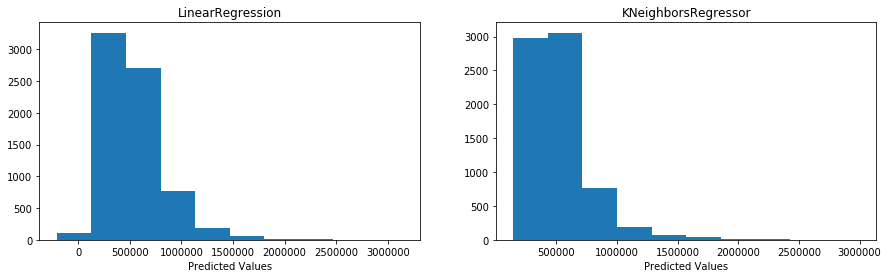

In [22]:
fig = plt.figure(figsize=(15,4))
for i in range(2) :
    y = df.price
    X = df[original_variables]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)
    models[i].fit(X_train, y_train)
    yhat = models[i].predict(X_test)
    
    ax = fig.add_subplot(1,2,i+1)
    ax.hist(yhat)
    ax.set_title(type(models[i]).__name__)
    ax.set_xlabel('Predicted Values')

*From the distribution plots, we observe that some of the predicted values for the LinearRegression model are negative.*

*That's not the case with the KNN model as it always predicts a local average between existing target values.*

## Question 9
One recurrent question when using nearest neighbor models, is how to choose the k parameter.

Let's look at the influence of the parameter k on the performance of the KNN model.

In [23]:
results = []
for k in range(1, 17) :
    scores = {}
    y = df.log_price
    X = df[log_variables]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    scores['K'] = k
    scores['RMSE'] = np.sqrt(mean_squared_error(yhat, y_test))
    scores['MAE'] = np.sqrt(mean_absolute_error(yhat, y_test))
    scores['R²'] = model.score(X_test, y_test)
    results.append(scores)
    
results = pd.DataFrame(results).set_index('K')
results.head()

,RMSE,MAE,R²
K,,,
1,0.407305,0.557065,0.385289
2,0.355413,0.523889,0.531945
3,0.337414,0.510696,0.578151
4,0.329436,0.505365,0.597865
5,0.323741,0.501435,0.611648


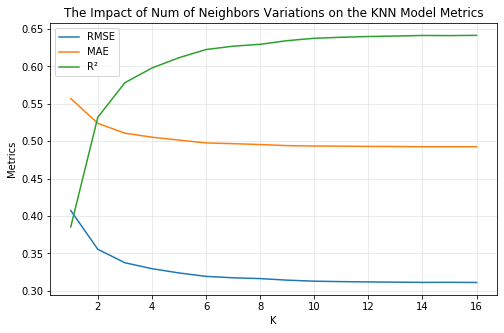

In [24]:
plt.figure(figsize=(8,5))
for i in range(3) :
    col = results.columns[i]
    plt.plot(results.index, results[col], label=col)
plt.title('The Impact of Num of Neighbors Variations on the KNN Model Metrics')
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.grid(alpha=0.3)

*The plot above shows that :*
* *As k increases, the prediction error (RMSE) decreases.*
* *The R^2 increases with higher k.*
* *Increasing k above k=10 does not improve the performance (R^2) of the model by much.*